In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/home/harikishan/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("../data/milknew.csv")

df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [4]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

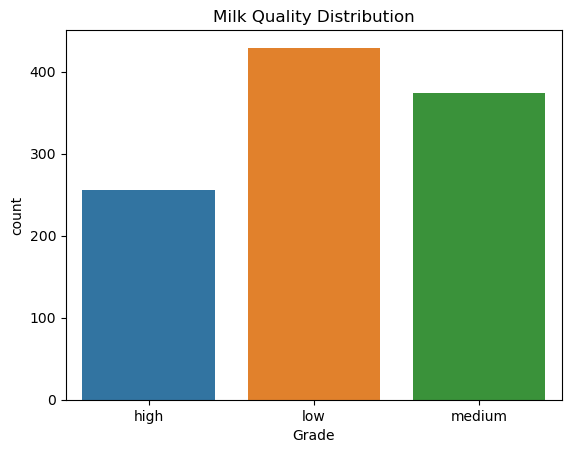

In [5]:
sns.countplot(x='Grade', data=df)
plt.title("Milk Quality Distribution")
plt.savefig("../results/class_distribution.png")
plt.show()

In [6]:
df['Grade'] = df['Grade'].map({
    'low': 0,
    'medium': 1,
    'high': 2
})

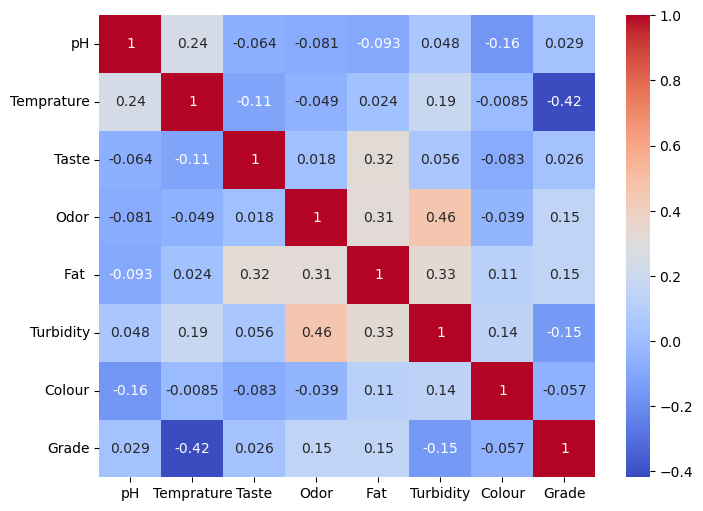

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

os.makedirs("../results", exist_ok=True)
plt.savefig("../results/correlation_heatmap.png")
plt.show()

In [8]:
X = df.drop('Grade', axis=1)
y = df['Grade']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9952830188679245


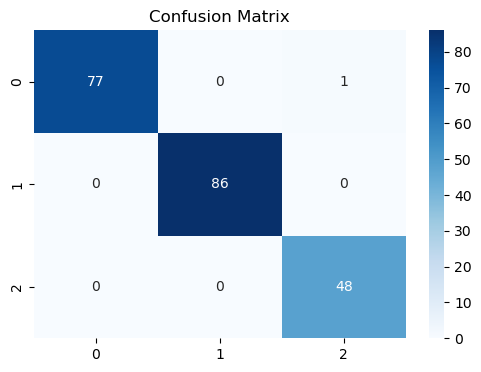

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")

plt.savefig("../results/confusion_matrix.png")
plt.show()

In [14]:
report = classification_report(y_test, y_pred)
print(report)

# Save to file
with open("../results/metrics.txt", "w") as f:
    f.write(f"Accuracy: {accuracy}\n\n")
    f.write(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       1.00      1.00      1.00        86
           2       0.98      1.00      0.99        48

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



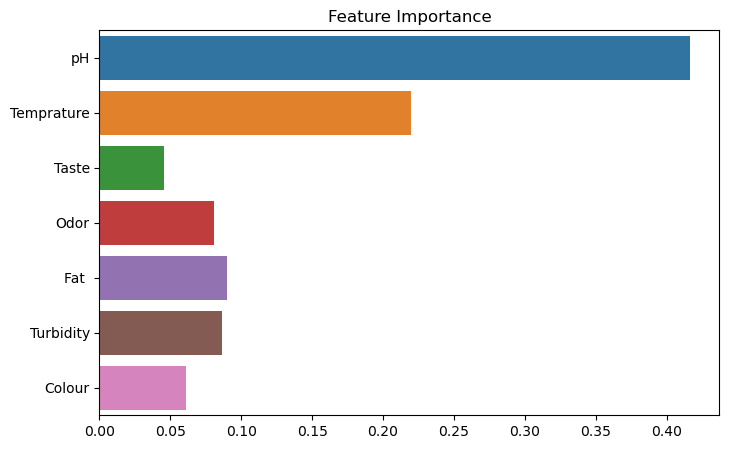

In [15]:
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")

plt.savefig("../results/feature_importance.png")
plt.show()

In [16]:
os.makedirs("../model", exist_ok=True)

with open("../model/model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!


In [17]:
sample = X_test.copy()
sample['Actual'] = y_test
sample['Predicted'] = y_pred

sample.to_csv("../results/sample_predictions.csv", index=False)

sample.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Actual,Predicted
576,6.6,40,1,0,1,1,255,2,2
312,4.5,60,0,1,1,1,250,0,0
70,9.0,43,1,0,1,1,250,0,0
682,6.8,45,0,0,0,1,255,1,1
896,6.6,38,0,0,0,0,255,1,1
